visualizacao inicial do dataframe:
                                                 url  \
0  https://www.acidadeon.com/ribeiraopreto/econom...   
1  https://www.acidadeon.com/ribeiraopreto/econom...   
2  https://www.acidadeon.com/ribeiraopreto/econom...   
3  https://www.acidadeon.com/ribeiraopreto/econom...   
4  https://www.acidadeon.com/ribeiraopreto/econom...   

                                              titulo  \
0  Aeroporto de Franca reabre após 4 anos e receb...   
1  Inscrições para concurso com salários de R$ 11...   
2  Moradores do interior de SP ganham prêmios da ...   
3  Mega-Sena premia apostadores do interior de SP...   
4  Governo de SP isenta IPVA de veículos não polu...   

                                           descricao        tags  \
0  Economia - Aeroporto de Franca reabre após 4 a...  [Economia]   
1  Economia - Inscrições para concurso com salári...  [Economia]   
2  Economia - Moradores do interior de SP ganham ...  [Economia]   
3  Economia - Mega-

<ipython-input-11-ebc254e6ebfc>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=noticias_por_dia.index, y=noticias_por_dia.values, palette='viridis')


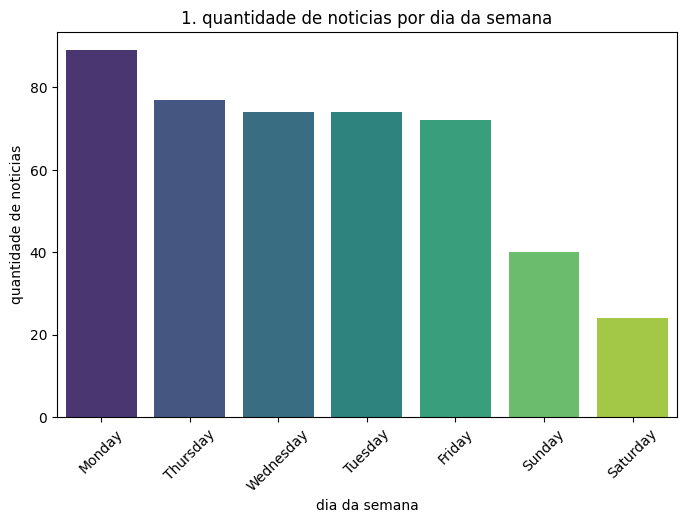

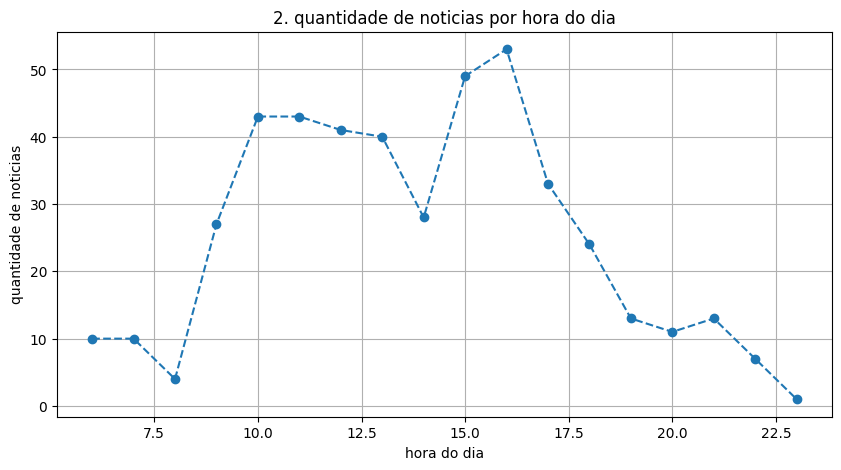

<ipython-input-11-ebc254e6ebfc>:66: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_resumo_tempo = df['data'].dt.to_period('M').value_counts().sort_index()


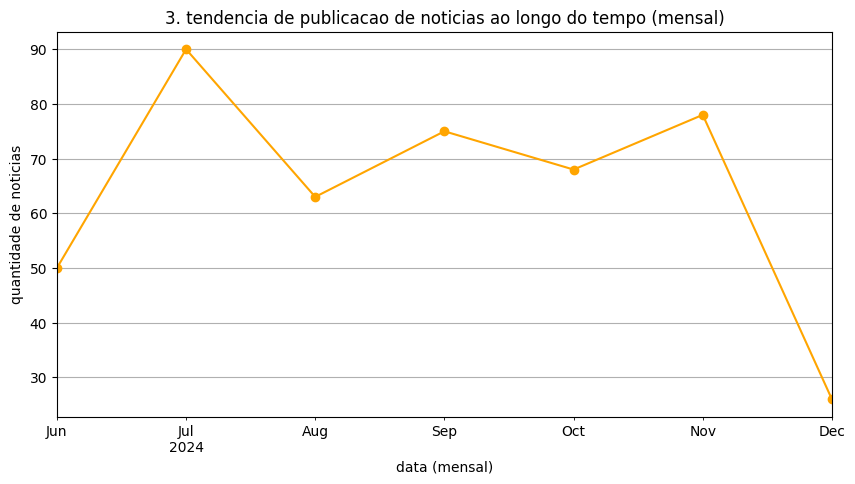

<ipython-input-11-ebc254e6ebfc>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tamanho_medio', y='tag', data=df_tamanho_tag.head(10), palette='coolwarm')


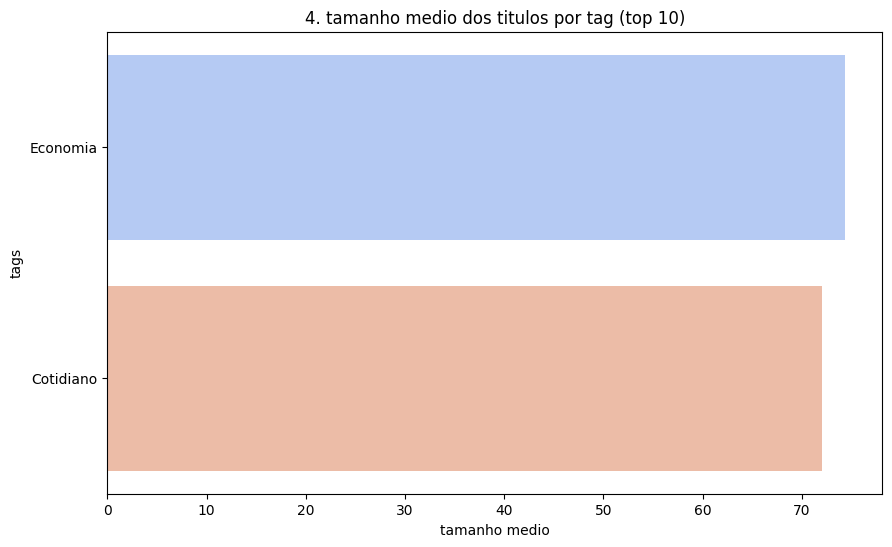

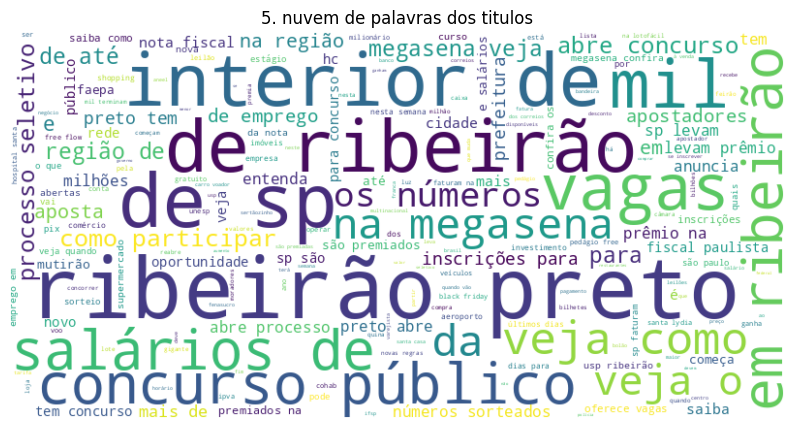

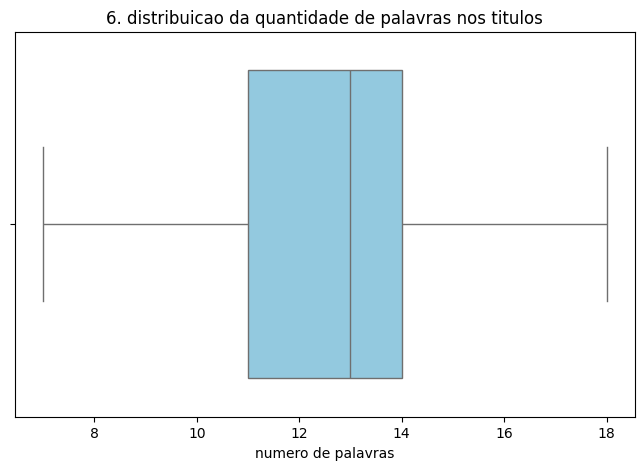

<ipython-input-11-ebc254e6ebfc>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tags_mais_comuns.values, y=tags_mais_comuns.index, palette='Blues_r')


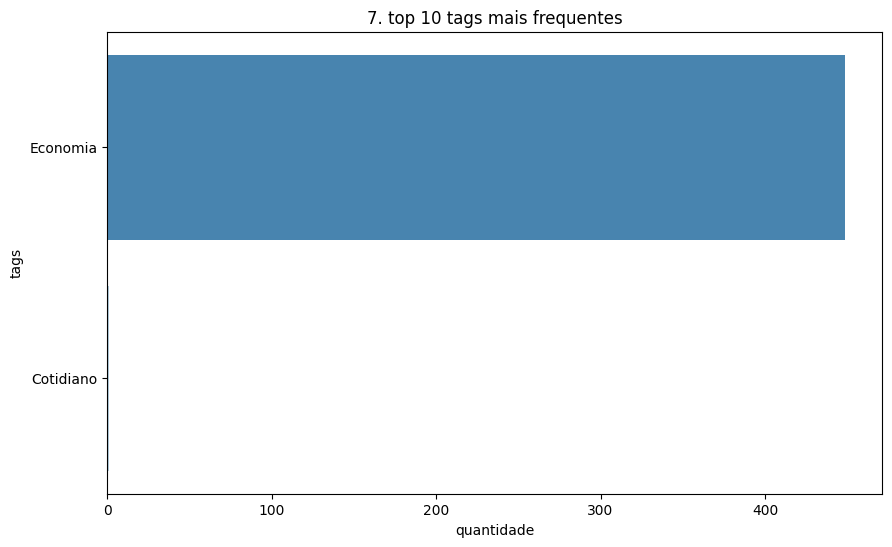

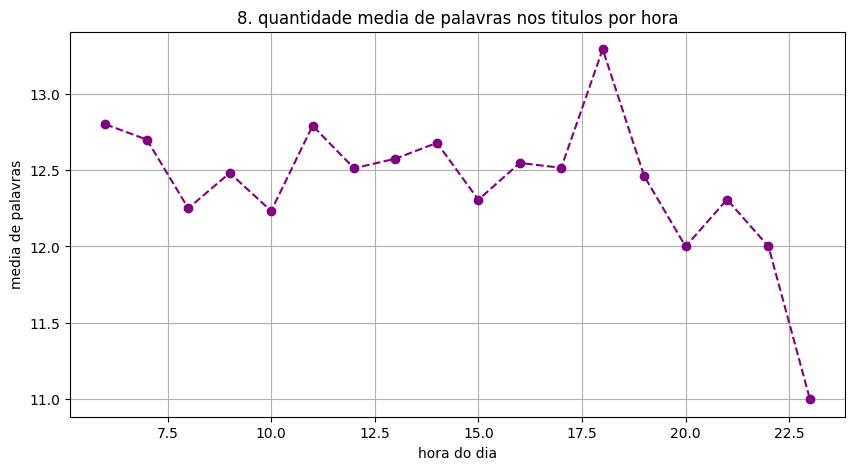

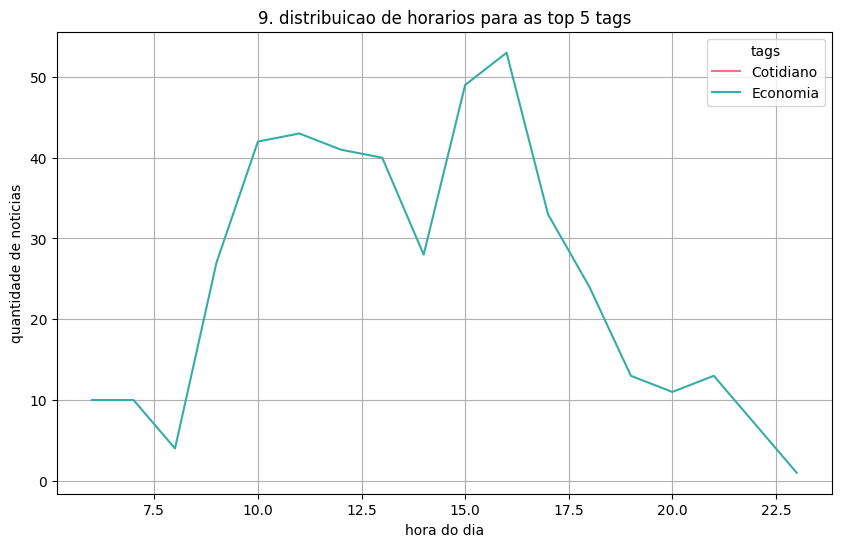


10. resumo estatistico:
numero total de noticias: 450
data mais antiga: 2024-06-13 18:43:00-03:00
data mais recente: 2024-12-14 15:47:44-03:00
tamanho medio dos titulos: 74.41 caracteres
quantidade media de palavras nos titulos: 12.53


<ipython-input-11-ebc254e6ebfc>:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=noticias_por_mes.index, y=noticias_por_mes.values, palette='Spectral')


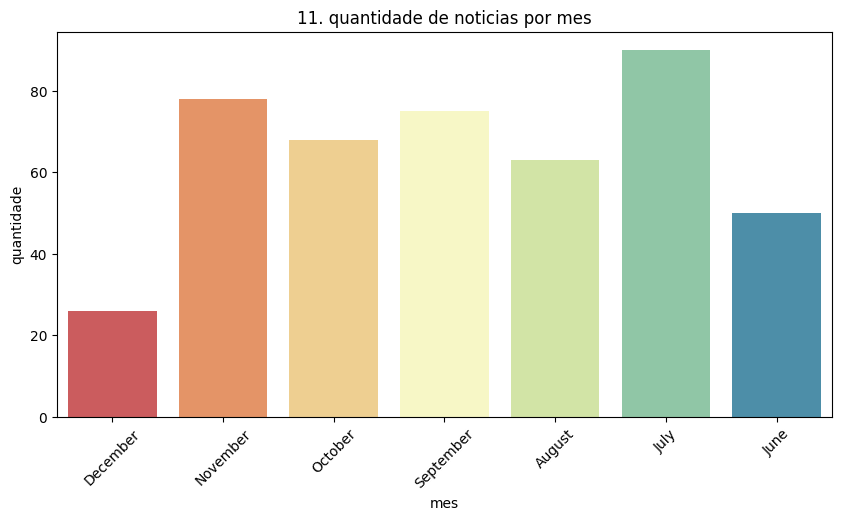

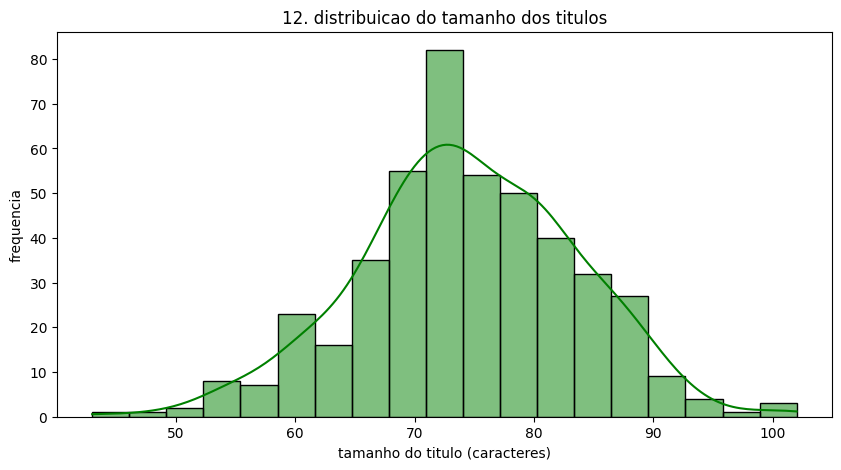

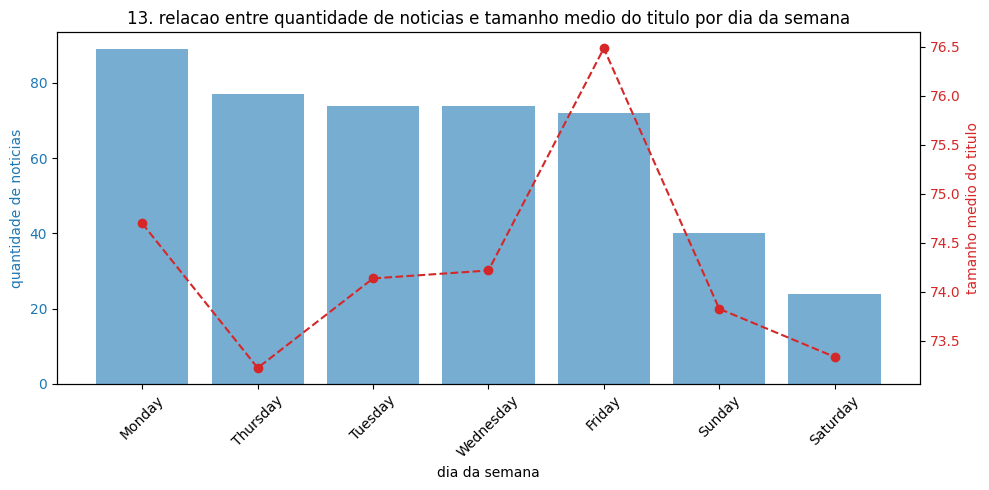

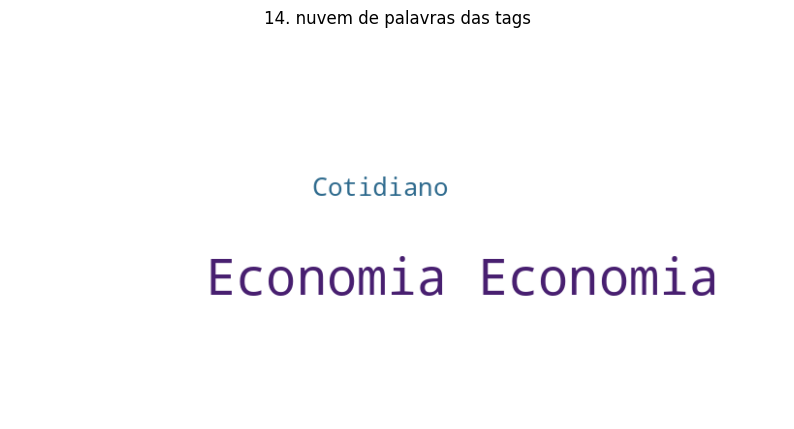

<ipython-input-11-ebc254e6ebfc>:199: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tags_por_mes = tags_tempo.groupby([tags_tempo['data'].dt.to_period('M'), 'tags']).size().reset_index(name='count')


<Figure size 1000x600 with 0 Axes>

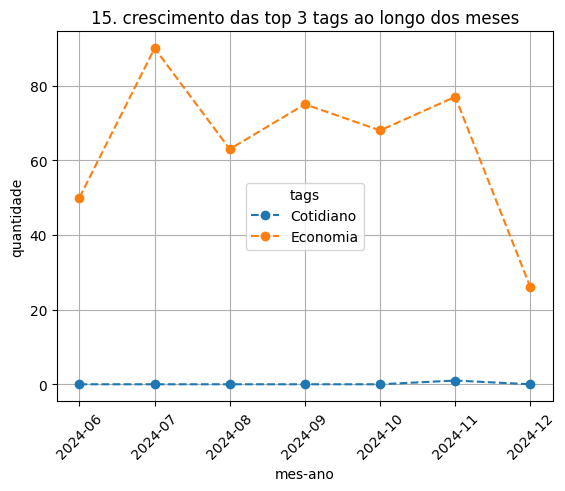

<ipython-input-11-ebc254e6ebfc>:213: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  mensal_resumo = df.groupby(df['data'].dt.to_period('M')).agg({'titulo':'count','tamanho_titulo':'mean'}).reset_index()


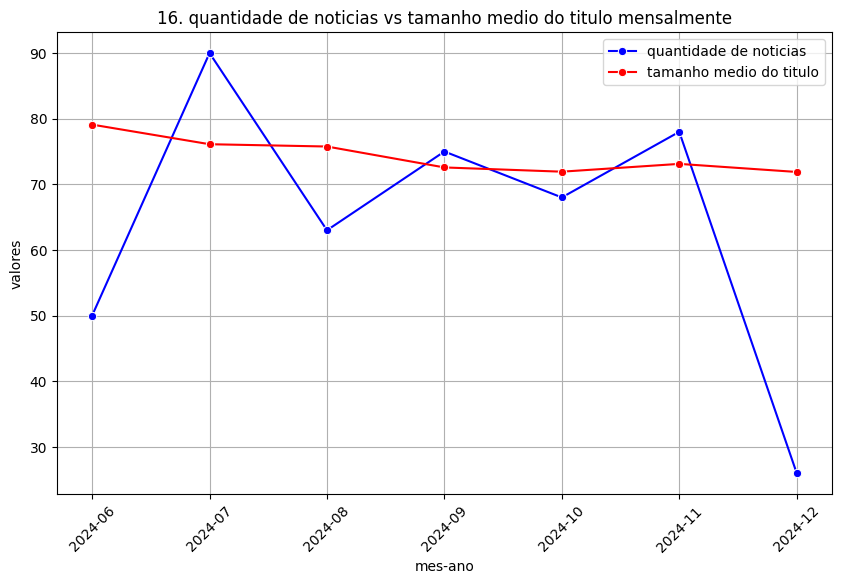

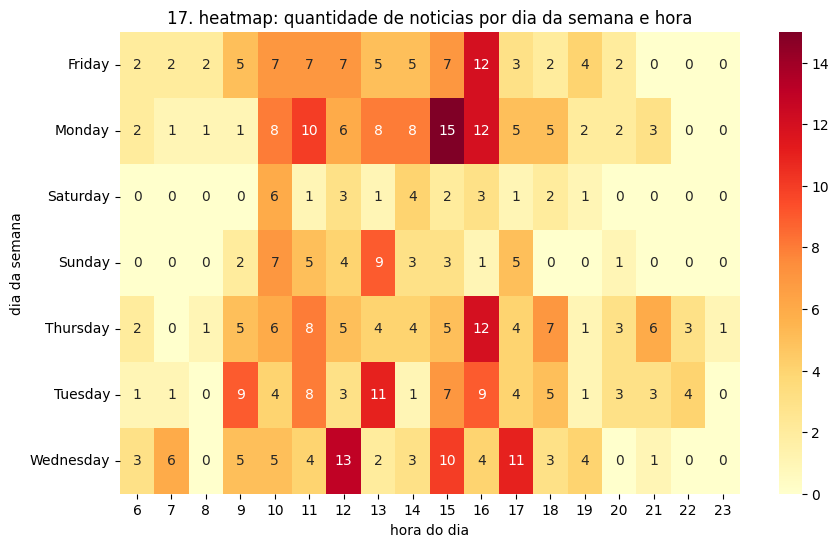

<ipython-input-11-ebc254e6ebfc>:241: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ano', y='tamanho_titulo', data=df, palette='Set2')


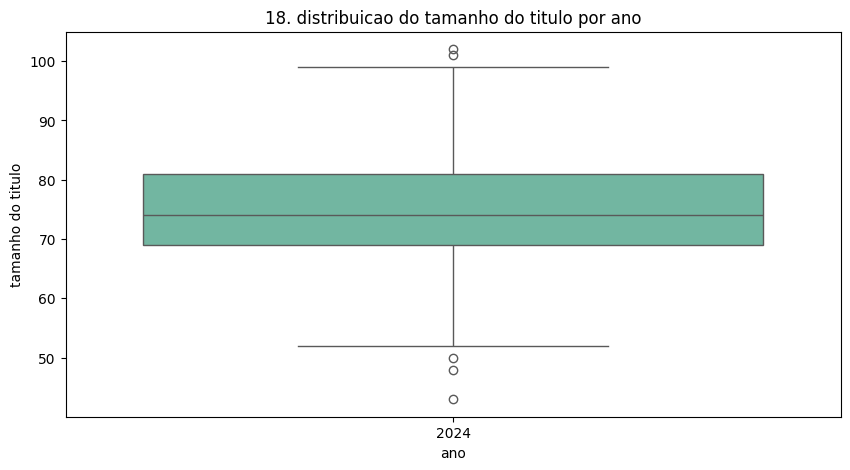

<ipython-input-11-ebc254e6ebfc>:249: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='dia_da_semana', y='quantidade_palavras_titulo', data=df, palette='Pastel1')


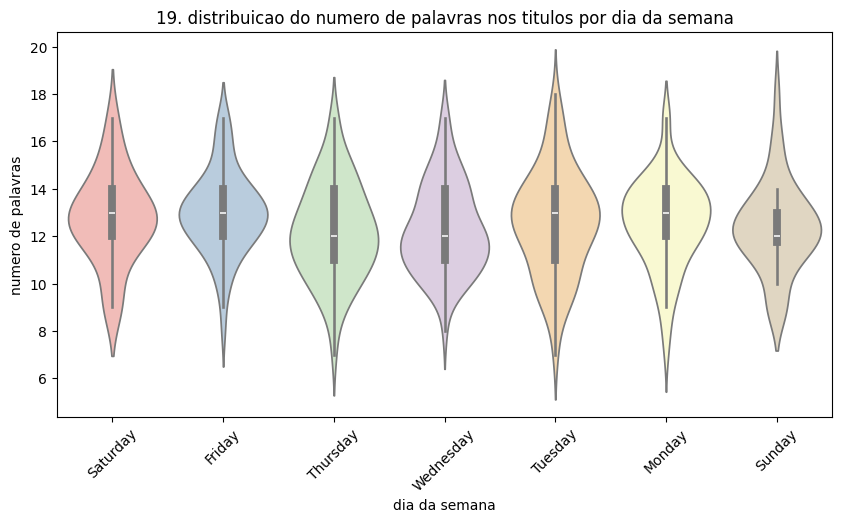

<ipython-input-11-ebc254e6ebfc>:260: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freq_top20), y=list(palavras_top20), palette='magma')


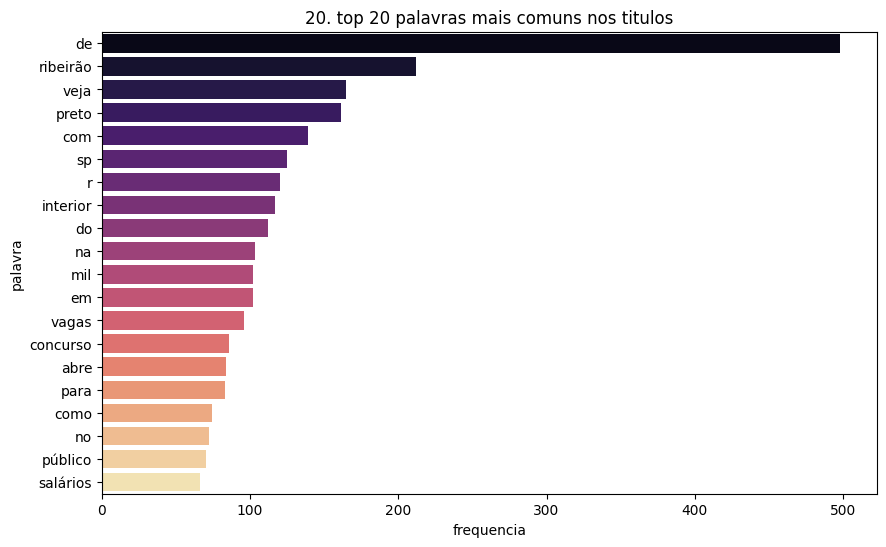

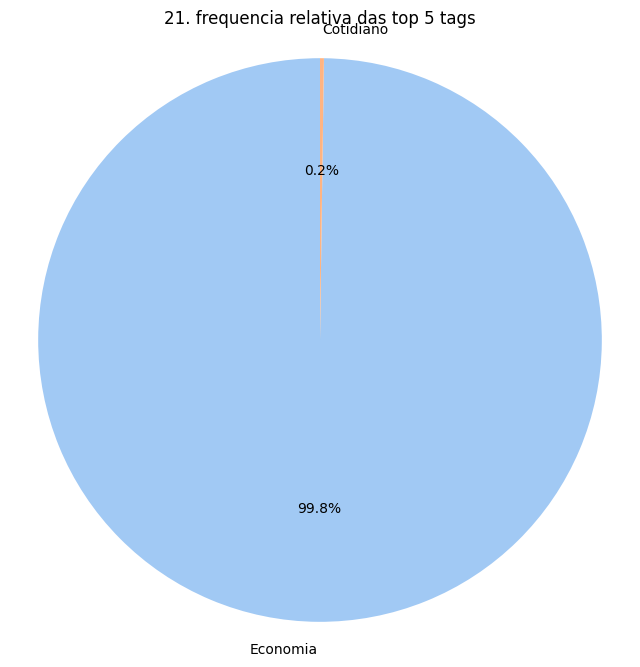

<ipython-input-11-ebc254e6ebfc>:280: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tag_a['tamanho_titulo'], shade=True, label=tag_a)
<ipython-input-11-ebc254e6ebfc>:281: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tag_b['tamanho_titulo'], shade=True, label=tag_b)
<ipython-input-11-ebc254e6ebfc>:281: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_tag_b['tamanho_titulo'], shade=True, label=tag_b)


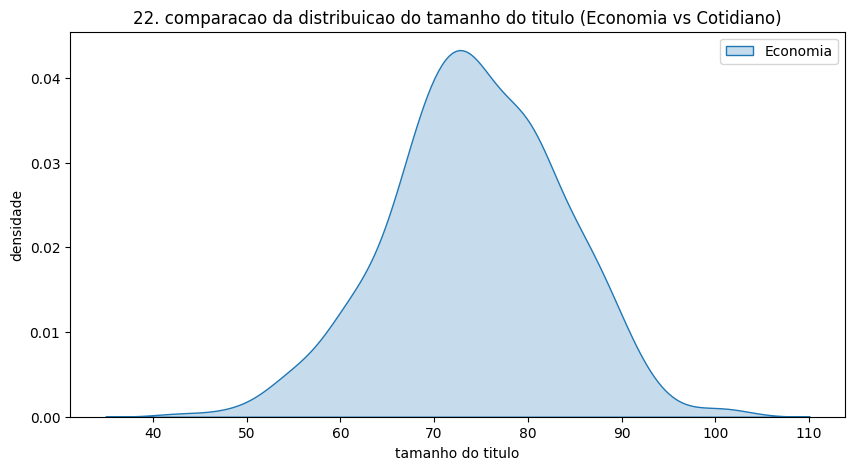

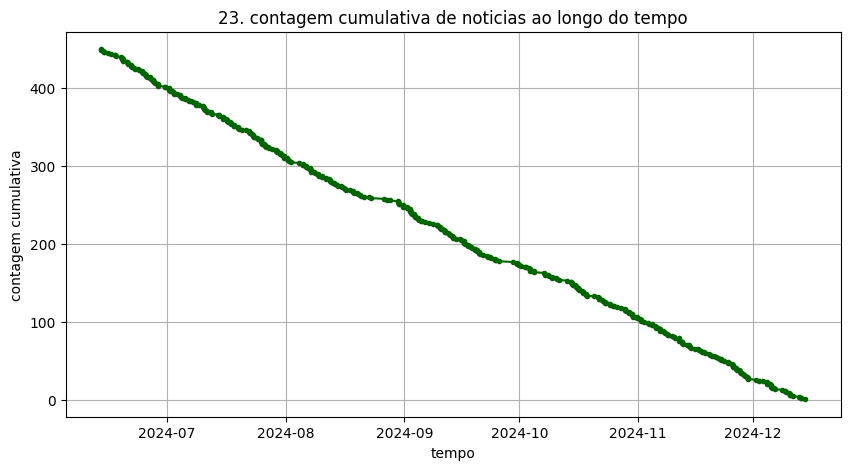

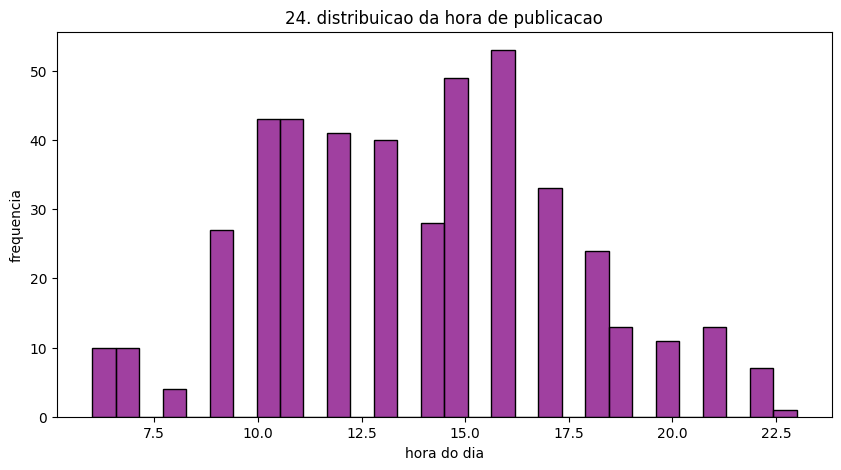

<ipython-input-11-ebc254e6ebfc>:315: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freq_desc), y=list(pal_desc), palette='cool')


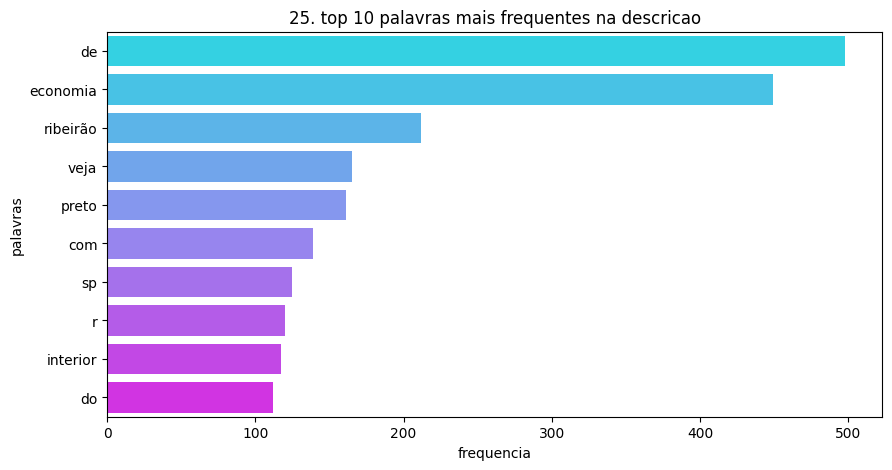

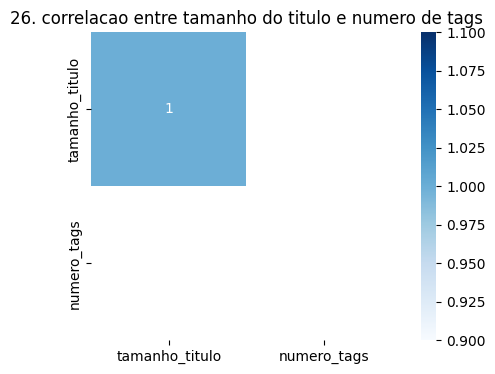

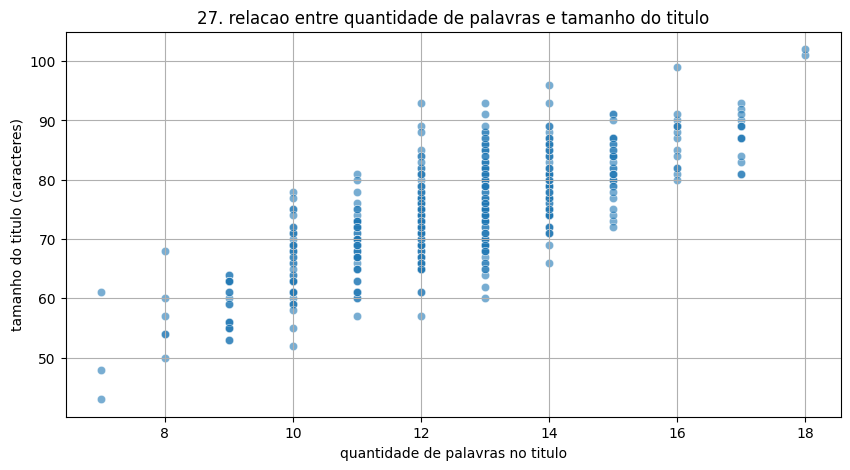

<ipython-input-11-ebc254e6ebfc>:339: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  mensal_count = df['data'].dt.to_period('M').value_counts().sort_index()


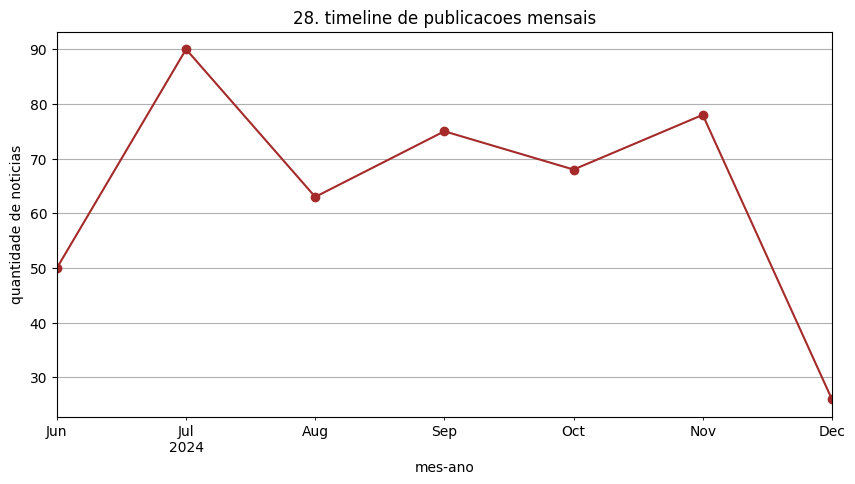

<ipython-input-11-ebc254e6ebfc>:352: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dominios_count.values, y=dominios_count.index, palette='YlGnBu')


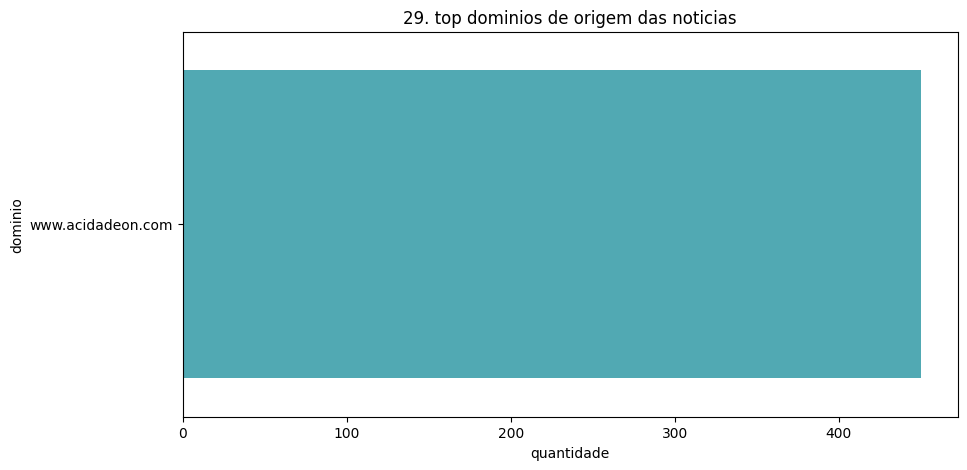

In [11]:
# importar bibliotecas necessarias
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import wordcloud
import re
import seaborn as sns
from urllib.parse import urlparse
import numpy as np

# carregar o arquivo noticias.json
caminho_arquivo = '/content/data/noticias.json'

# ler o arquivo json
with open(caminho_arquivo, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# converter os dados json em um dataframe pandas
df = pd.DataFrame(dados)

# Visualização inicial do dataframe
print('visualizacao inicial do dataframe:')
print(df.head())

# Conversão de datas e criação de colunas adicionais
df['data'] = pd.to_datetime(df['data'])
df['dia_da_semana'] = df['data'].dt.day_name()
df['hora'] = df['data'].dt.hour
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month_name()
df['dia'] = df['data'].dt.day

# Caso o campo de tags não seja sempre lista
df['tags'] = df['tags'].apply(lambda x: x if isinstance(x, list) else [])

# Calcular tamanho dos titulos
df['tamanho_titulo'] = df['titulo'].apply(len)
df['quantidade_palavras_titulo'] = df['titulo'].apply(lambda x: len(x.split()))

##############################################
################## ANÁLISES ##################
##############################################

# 1. quantidade de noticias por dia da semana
noticias_por_dia = df['dia_da_semana'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=noticias_por_dia.index, y=noticias_por_dia.values, palette='viridis')
plt.title('1. quantidade de noticias por dia da semana')
plt.xlabel('dia da semana')
plt.ylabel('quantidade de noticias')
plt.xticks(rotation=45)
plt.show()

# 2. quantidade de noticias por hora do dia
noticias_por_hora = df['hora'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(noticias_por_hora.index, noticias_por_hora.values, marker='o', linestyle='--')
plt.title('2. quantidade de noticias por hora do dia')
plt.xlabel('hora do dia')
plt.ylabel('quantidade de noticias')
plt.grid()
plt.show()

# 3. distribuicao temporal das noticias (mensal)
df_resumo_tempo = df['data'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 5))
df_resumo_tempo.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('3. tendencia de publicacao de noticias ao longo do tempo (mensal)')
plt.xlabel('data (mensal)')
plt.ylabel('quantidade de noticias')
plt.grid()
plt.show()

# 4. tamanho medio dos titulos por tag
tamanho_por_tag = []
for tag in df['tags'].explode().unique():
    if tag is not None:
        tamanho_medio = df[df['tags'].apply(lambda x: tag in x)]['tamanho_titulo'].mean()
        tamanho_por_tag.append((tag, tamanho_medio))

df_tamanho_tag = pd.DataFrame(tamanho_por_tag, columns=['tag', 'tamanho_medio']).dropna().sort_values(by='tamanho_medio', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='tamanho_medio', y='tag', data=df_tamanho_tag.head(10), palette='coolwarm')
plt.title('4. tamanho medio dos titulos por tag (top 10)')
plt.xlabel('tamanho medio')
plt.ylabel('tags')
plt.show()

# 5. palavras mais frequentes nos titulos (wordcloud)
todos_titulos = ' '.join(df['titulo'])
texto_limpo_titulos = re.sub(r'[^a-zA-Zà-úÀ-Ú\s]', '', todos_titulos)
palavras_titulos = [palavra.lower() for palavra in texto_limpo_titulos.split()]
contador_palavras_titulos = Counter(palavras_titulos)

wc_titulos = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(' '.join(palavras_titulos))
plt.figure(figsize=(10, 6))
plt.imshow(wc_titulos, interpolation='bilinear')
plt.axis('off')
plt.title('5. nuvem de palavras dos titulos')
plt.show()

# 6. boxplot da quantidade de palavras nos titulos
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['quantidade_palavras_titulo'], color='skyblue')
plt.title('6. distribuicao da quantidade de palavras nos titulos')
plt.xlabel('numero de palavras')
plt.show()

# 7. top 10 tags mais frequentes
tags_exploded = df['tags'].explode()
tags_mais_comuns = tags_exploded.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=tags_mais_comuns.values, y=tags_mais_comuns.index, palette='Blues_r')
plt.title('7. top 10 tags mais frequentes')
plt.xlabel('quantidade')
plt.ylabel('tags')
plt.show()

# 8. analise entre hora e tamanho medio do titulo
media_palavras_hora = df.groupby('hora')['quantidade_palavras_titulo'].mean()
plt.figure(figsize=(10, 5))
plt.plot(media_palavras_hora.index, media_palavras_hora.values, marker='o', color='purple', linestyle='--')
plt.title('8. quantidade media de palavras nos titulos por hora')
plt.xlabel('hora do dia')
plt.ylabel('media de palavras')
plt.grid()
plt.show()

# 9. distribuicao de horarios para as top 5 tags
top_5_tags = tags_exploded.value_counts().head(5).index
tags_hora = df.explode('tags').groupby(['tags', 'hora']).size().reset_index(name='quantidade')
tags_hora_filtrado = tags_hora[tags_hora['tags'].isin(top_5_tags)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=tags_hora_filtrado, x='hora', y='quantidade', hue='tags', palette='husl')
plt.title('9. distribuicao de horarios para as top 5 tags')
plt.xlabel('hora do dia')
plt.ylabel('quantidade de noticias')
plt.legend(title='tags')
plt.grid()
plt.show()

# 10. resumo estatistico
print('\n10. resumo estatistico:')
print(f'numero total de noticias: {len(df)}')
print(f'data mais antiga: {df["data"].min()}')
print(f'data mais recente: {df["data"].max()}')
print(f'tamanho medio dos titulos: {df["tamanho_titulo"].mean():.2f} caracteres')
print(f'quantidade media de palavras nos titulos: {df["quantidade_palavras_titulo"].mean():.2f}')

# 11. quantidade de noticias por mes (agrupado por nome do mes)
noticias_por_mes = df['mes'].value_counts().reindex(df['mes'].unique(), fill_value=0)
plt.figure(figsize=(10,5))
sns.barplot(x=noticias_por_mes.index, y=noticias_por_mes.values, palette='Spectral')
plt.title('11. quantidade de noticias por mes')
plt.xlabel('mes')
plt.ylabel('quantidade')
plt.xticks(rotation=45)
plt.show()

# 12. distribuicao do tamanho dos titulos (histograma)
plt.figure(figsize=(10,5))
sns.histplot(df['tamanho_titulo'], kde=True, color='green')
plt.title('12. distribuicao do tamanho dos titulos')
plt.xlabel('tamanho do titulo (caracteres)')
plt.ylabel('frequencia')
plt.show()

# 13. relacao entre quantidade de noticias e tamanho medio do titulo por dia da semana
noticias_titulo_dia = df.groupby('dia_da_semana').agg({'titulo':'count','tamanho_titulo':'mean'}).sort_values(by='titulo', ascending=False)
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:blue'
ax1.bar(noticias_titulo_dia.index, noticias_titulo_dia['titulo'], color=color, alpha=0.6)
ax1.set_xlabel('dia da semana')
ax1.set_ylabel('quantidade de noticias', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(noticias_titulo_dia.index, noticias_titulo_dia['tamanho_titulo'], color=color, marker='o', linestyle='--')
ax2.set_ylabel('tamanho medio do titulo', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('13. relacao entre quantidade de noticias e tamanho medio do titulo por dia da semana')
plt.tight_layout()
plt.show()

# 14. nuvem de palavras das tags
todas_tags = ' '.join(tags_exploded.dropna().astype(str))
wc_tags = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(todas_tags)
plt.figure(figsize=(10,6))
plt.imshow(wc_tags, interpolation='bilinear')
plt.axis('off')
plt.title('14. nuvem de palavras das tags')
plt.show()

# 15. analise do crescimento das tags ao longo do tempo (mensal)
tags_tempo = df.explode('tags')
tags_por_mes = tags_tempo.groupby([tags_tempo['data'].dt.to_period('M'), 'tags']).size().reset_index(name='count')
tags_por_mes['data_period'] = tags_por_mes['data'].astype(str)
top_3_tags = tags_exploded.value_counts().head(3).index
tags_por_mes_top3 = tags_por_mes[tags_por_mes['tags'].isin(top_3_tags)].pivot(index='data_period', columns='tags', values='count').fillna(0)
plt.figure(figsize=(10,6))
tags_por_mes_top3.plot(marker='o', linestyle='--')
plt.title('15. crescimento das top 3 tags ao longo dos meses')
plt.xlabel('mes-ano')
plt.ylabel('quantidade')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 16. variacao do tamanho medio do titulo vs quantidade de noticias mensalmente
mensal_resumo = df.groupby(df['data'].dt.to_period('M')).agg({'titulo':'count','tamanho_titulo':'mean'}).reset_index()
# converter periodo para string
mensal_resumo['data'] = mensal_resumo['data'].astype(str)

plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=mensal_resumo, x='data', y='titulo', marker='o', color='blue', label='quantidade de noticias')
ax2 = sns.lineplot(data=mensal_resumo, x='data', y='tamanho_titulo', marker='o', color='red', label='tamanho medio do titulo')

plt.title('16. quantidade de noticias vs tamanho medio do titulo mensalmente')
plt.xlabel('mes-ano')
plt.ylabel('valores')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 17. mapa de calor da frequencia de noticias por dia da semana e hora do dia
freq_dia_hora = df.groupby(['dia_da_semana','hora']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(freq_dia_hora, cmap='YlOrRd', annot=True, fmt='d')
plt.title('17. heatmap: quantidade de noticias por dia da semana e hora')
plt.xlabel('hora do dia')
plt.ylabel('dia da semana')
plt.yticks(rotation=0)
plt.show()

# 18. boxplot do tamanho do titulo por ano
plt.figure(figsize=(10,5))
sns.boxplot(x='ano', y='tamanho_titulo', data=df, palette='Set2')
plt.title('18. distribuicao do tamanho do titulo por ano')
plt.xlabel('ano')
plt.ylabel('tamanho do titulo')
plt.show()

# 19. violin plot do numero de palavras no titulo por dia da semana
plt.figure(figsize=(10,5))
sns.violinplot(x='dia_da_semana', y='quantidade_palavras_titulo', data=df, palette='Pastel1')
plt.title('19. distribuicao do numero de palavras nos titulos por dia da semana')
plt.xlabel('dia da semana')
plt.ylabel('numero de palavras')
plt.xticks(rotation=45)
plt.show()

# 20. top 20 palavras mais comuns nos titulos (barplot)
palavras_mais_comuns = contador_palavras_titulos.most_common(20)
palavras_top20, freq_top20 = zip(*palavras_mais_comuns)
plt.figure(figsize=(10,6))
sns.barplot(x=list(freq_top20), y=list(palavras_top20), palette='magma')
plt.title('20. top 20 palavras mais comuns nos titulos')
plt.xlabel('frequencia')
plt.ylabel('palavra')
plt.show()

# 21. frequencia relativa das tags mais comuns (pie chart)
tags_relativas = tags_exploded.value_counts(normalize=True).head(5)
plt.figure(figsize=(8,8))
plt.pie(tags_relativas.values, labels=tags_relativas.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('21. frequencia relativa das top 5 tags')
plt.axis('equal')
plt.show()

# 22. comparacao da distribuicao de tamanho de titulo para uma tag especifica vs outra
tag_a = 'Economia'
tag_b = 'Cotidiano'
df_tag_a = df[df['tags'].apply(lambda x: tag_a in x)]
df_tag_b = df[df['tags'].apply(lambda x: tag_b in x)]
plt.figure(figsize=(10,5))
sns.kdeplot(df_tag_a['tamanho_titulo'], shade=True, label=tag_a)
sns.kdeplot(df_tag_b['tamanho_titulo'], shade=True, label=tag_b)
plt.title(f'22. comparacao da distribuicao do tamanho do titulo ({tag_a} vs {tag_b})')
plt.xlabel('tamanho do titulo')
plt.ylabel('densidade')
plt.legend()
plt.show()

# 23. contagem cumulativa de noticias ao longo do tempo
df_sorted = df.sort_values(by='data')
df_sorted['contagem_cumulativa'] = df_sorted.index + 1
plt.figure(figsize=(10,5))
plt.plot(df_sorted['data'], df_sorted['contagem_cumulativa'], color='darkgreen', marker='.')
plt.title('23. contagem cumulativa de noticias ao longo do tempo')
plt.xlabel('tempo')
plt.ylabel('contagem cumulativa')
plt.grid()
plt.show()

# 24. histograma do horario de publicacao (com mais granularidade)
plt.figure(figsize=(10,5))
sns.histplot(df['hora'], bins=30, kde=False, color='purple')
plt.title('24. distribuicao da hora de publicacao')
plt.xlabel('hora do dia')
plt.ylabel('frequencia')
plt.show()

# 25. palavras mais frequentes na descricao
todas_descricoes = ' '.join(df['descricao'].astype(str))
texto_limpo_desc = re.sub(r'[^a-zA-Zà-úÀ-Ú\s]', '', todas_descricoes)
palavras_desc = [p.lower() for p in texto_limpo_desc.split()]
contador_palavras_desc = Counter(palavras_desc)
top10_desc = contador_palavras_desc.most_common(10)
pal_desc, freq_desc = zip(*top10_desc)
plt.figure(figsize=(10,5))
sns.barplot(x=list(freq_desc), y=list(pal_desc), palette='cool')
plt.title('25. top 10 palavras mais frequentes na descricao')
plt.xlabel('frequencia')
plt.ylabel('palavras')
plt.show()

# 26. correlacao entre tamanho do titulo e numero de tags associadas
df['numero_tags'] = df['tags'].apply(len)
corr = df[['tamanho_titulo','numero_tags']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('26. correlacao entre tamanho do titulo e numero de tags')
plt.show()

# 27. scatter plot entre quantidade de palavras no titulo e tamanho do titulo em caracteres
plt.figure(figsize=(10,5))
sns.scatterplot(x='quantidade_palavras_titulo', y='tamanho_titulo', data=df, alpha=0.6)
plt.title('27. relacao entre quantidade de palavras e tamanho do titulo')
plt.xlabel('quantidade de palavras no titulo')
plt.ylabel('tamanho do titulo (caracteres)')
plt.grid()
plt.show()

# 28. linha do tempo de publicacoes com pontos indicando frequencia mensal
mensal_count = df['data'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10,5))
mensal_count.plot(marker='o', linestyle='-', color='brown')
plt.title('28. timeline de publicacoes mensais')
plt.xlabel('mes-ano')
plt.ylabel('quantidade de noticias')
plt.grid()
plt.show()

# 29. distribuicao da quantidade de noticias por dominio (URL base)
df['dominio'] = df['url'].apply(lambda x: urlparse(x).netloc)
dominios_count = df['dominio'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=dominios_count.values, y=dominios_count.index, palette='YlGnBu')
plt.title('29. top dominios de origem das noticias')
plt.xlabel('quantidade')
plt.ylabel('dominio')
plt.show()
